In [236]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm, tqdm_notebook

In [16]:
df_hourly = pd.read_csv("../m4_data/hourly-train.csv")
df_daily = pd.read_csv("../m4_data/Daily-train.csv")
df_monthly = pd.read_csv("../m4_data/Monthly-train.csv")
df_quarterly = pd.read_csv("../m4_data/Quarterly-train.csv")
df_weekly = pd.read_csv("../m4_data/Weekly-train.csv")
df_yearly = pd.read_csv("../m4_data/Yearly-train.csv")
print(f"daily shape: {df_daily.shape}")
print(f"monthly shape: {df_monthly.shape}")
print(f"quarterly shape: {df_quarterly.shape}")
print(f"weekly shape: {df_weekly.shape}")
print(f"yearly shape: {df_yearly.shape}")

daily shape: (4227, 9920)
monthly shape: (48000, 2795)
quarterly shape: (24000, 867)
weekly shape: (359, 2598)
yearly shape: (23000, 836)


### Idea
search engine that has m-competition as training set as baseline in it 
you can upload a time series an retrieve the k closest time series
parameter can be how many coeefficients from the transform you can keep
find all time series with a threshold less than x
do with FFT and wavelets

### outline
create a database that allows you to enter time series and you can find the right training data based on few data samples that you have with very low compute time

201


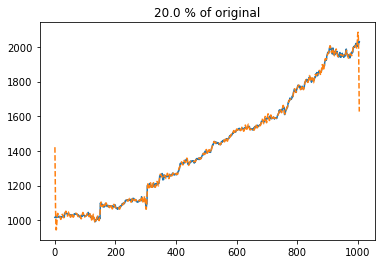

150


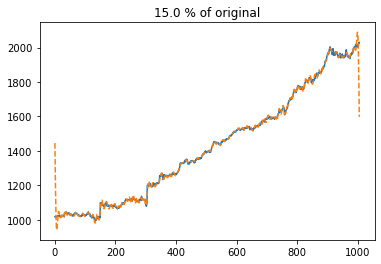

100


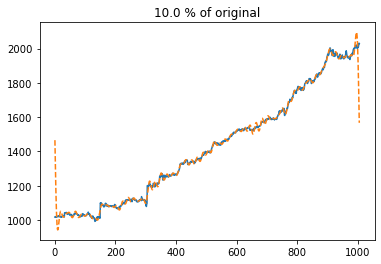

50


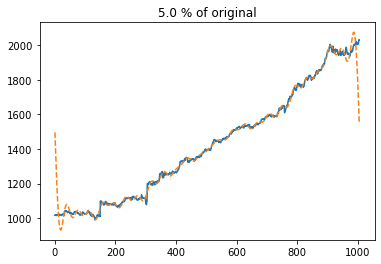

10


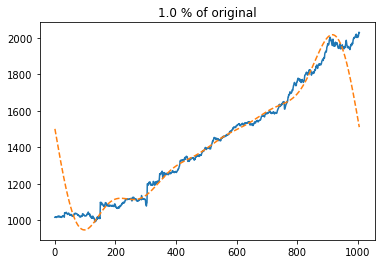

1


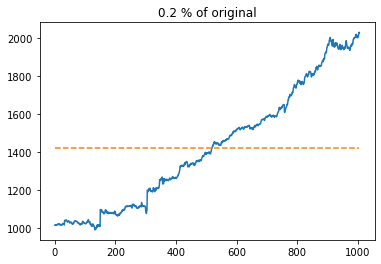

0


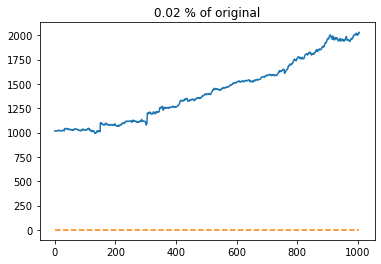

In [26]:
tsSort = np.sort(np.abs(foo))

error = []

for keep in (0.2, 0.15, 0.1, 0.05, 0.01, 0.002, 0.0002):
    thresh = tsSort[int(np.floor((1-keep)*len(tsSort)))]
    idx = np.abs(foo)>thresh         # find indexes larger than threshold
    print(idx.sum())
    tsTlow = foo * idx               # apply threshold to the transformed ts
    tsLow = np.fft.ifft(tsTlow).real # rebuild ts from compressed transformation.
    np.square(np.abs(foo) - np.abs(tsLow)).sum()  # compute error
    x = np.array(range(foo.shape[0]))
    
    # error
    error.append(np.square(np.abs(ar) - np.abs(tsLow)).sum())
    
    # plotting
    plt.plot(x, ar)
    plt.plot(x, tsLow, linestyle='--')
    title = str(keep*100) + " % of original"
    plt.title(title)
    plt.show()
    
    

<ipython-input-27-96029a42afeb>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(freq[L], PSD[L], color='c', LineWidth=2, label="PSD of ts")
/Users/philipp/anaconda3/envs/unic2/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


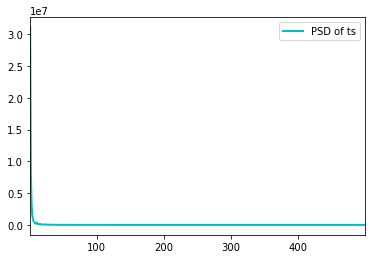

In [27]:
n = ar.shape[0]
dt = 0.001
fhat = np.fft.fft(ar)  # compute the FFT
PSD = fhat * np.conj(fhat) / n # power spectrum (power per frequency)
freq = (1/(dt*n)) * np.arange(n) # create x-axis of frequencies
L = np.arange(1,np.floor(n/2), dtype='int')

plt.plot(freq[L], PSD[L], color='c', LineWidth=2, label="PSD of ts")
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()
plt.show()

100%|██████████| 414/414 [00:01<00:00, 238.92it/s]


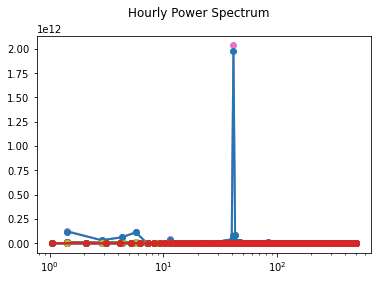

In [31]:
fig, axes = plt.subplots(1, 1, sharey=True)
axes.set_xscale('log')
for ts_name in tqdm(df_hourly.iloc[:,0]):
    ar = np.array(df_hourly[df_hourly['V1']==ts_name].iloc[:,1:].dropna(axis=1))[0]
    n = ar.shape[0]
    dt = 0.001
    fhat = np.abs(np.fft.fft(ar))  # compute the FFT
    PSD = fhat * np.conj(fhat) / n # power spectrum (power per frequency)
    freq = (1/(dt*n)) * np.arange(n) # create x-axis of frequencies
    L = np.arange(1,np.floor(n/2), dtype='int')
    
    # adding plots t
    plt.plot(freq[L], PSD[L], "o-", linewidth=2, label=ts_name)
title = "Hourly Power Spectrum"
fig.suptitle(title)
plt.show()

### Get Frequency distribution

In [6]:
# loop over all datasets
for df_ts in tqdm(df_w_l):
    # loop over each series in a dataset
    for ts_name in df_ts.iloc[:,0]:
        ar = np.array(df_ts[df_ts['id']==ts_name].iloc[:,6:].dropna(axis=1))[0]


        n = ar.shape[0]
        fhat = np.abs(np.fft.fft(ar))  # compute the FFT
        PSD = fhat * np.conj(fhat) / n # power spectrum (power per frequency)
        freq = (1/(dt*n)) * np.arange(n) # create x-axis of frequencies
        L = np.arange(1,np.floor(n/2), dtype='int')

        # capture base data for ts
        df_w_f_base = df_w_f_base.append(pd.DataFrame([[ts_name, ts_name[0],
                                                    dt, ar.shape[0],
                                                   (1/(dt*n))]],
                                                 columns=df_cols))

        # count occurence of individual frequencies
        l_w_freq.extend(list(freq))

NameError: name 'df_w_l' is not defined